# Metadata

**Author**: Ejay Aguirre

**Last Updated**: 08-07-2025

**Link**: https://www.ncei.noaa.gov/access/monitoring/enso/sst/

# Introduction

This notebook processes and visualizes the Oceanic Niño Index (ONI) data to classify El Niño, La Niña, and Neutral events. The output will be a plot showing these classifications as color-coded overlays, which will be used to compare with other timeseries data.

### Required Libraries

This notebook requires the following Python Libraries:
* `pandas`
* `matplotlib`

You can install them using the following command:
```bash
!pip install pandas matplotlib

In [9]:
!pip install pandas matplotlib -q

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

/tmp/ipykernel_14003/3530049605.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  oni = pd.read_csv(


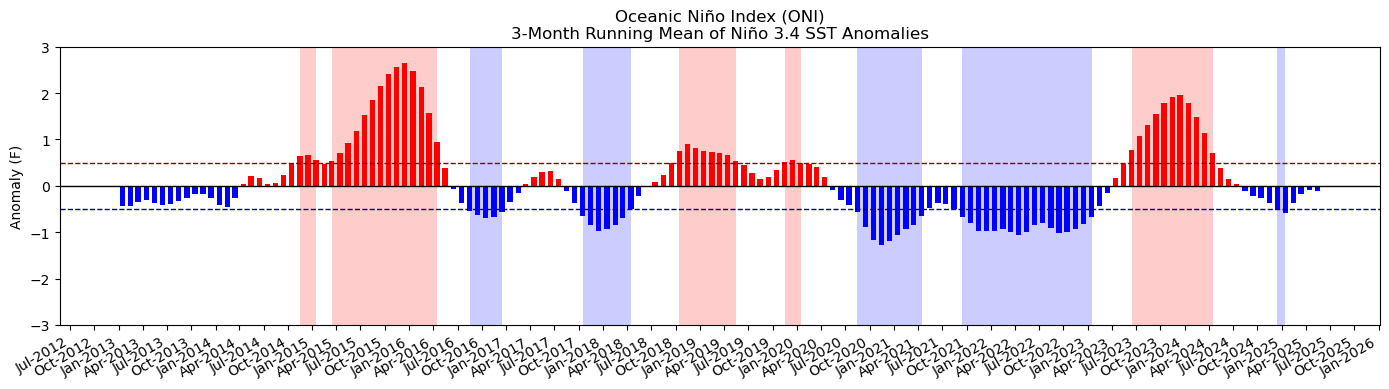

In [11]:
# Read the local ONI file (seasonal 3-mo means)
path = '/home/jovyan/oni.ascii.txt'
oni = pd.read_csv(
    path,
    delim_whitespace=True,
    skiprows=1,     
    names=['SEAS','YEAR','TOTAL','ANOMALY']
)

# Convert the 3-letter season code into a “mid-month” integer
season_to_month = {
    'DJF': 1, 'JFM': 2, 'FMA': 3, 'MAM': 4,
    'AMJ': 5, 'MJJ': 6, 'JJA': 7, 'JAS': 8,
    'ASO': 9, 'SON':10, 'OND':11, 'NDJ':12
}
oni['MONTH'] = oni['SEAS'].map(season_to_month)

# Build a datetime index at the 15th of the mid-month
oni['DATE'] = pd.to_datetime(dict(
    year=oni.YEAR,
    month=oni.MONTH,
    day=15
))
oni = oni.set_index('DATE')

oni = oni.loc['2013-01-01':]

# Classification of El Niño / La Niña / Neutral
def enso(x):
    if x >=  0.5: return 'El Niño'
    if x <= -0.5: return 'La Niña'
    return 'Neutral'

oni['PHASE'] = oni.ANOMALY.map(enso)

# Plot
fig, ax = plt.subplots(figsize=(14,4))

# background shading
grp = (oni.PHASE != oni.PHASE.shift()).cumsum()
for _, g in oni.groupby(grp):
    phase = g.PHASE.iloc[0]
    if phase == 'El Niño':
        ax.axvspan(g.index[0], g.index[-1], color='red',   alpha = 0.2, lw = 0)
    elif phase == 'La Niña':
        ax.axvspan(g.index[0], g.index[-1], color='blue',  alpha = 0.2, lw = 0)

# bar plot of anomalies
colors = oni.ANOMALY.apply(lambda v: 'red' if v>0 else 'blue')
ax.bar(oni.index, oni.ANOMALY, width = 20, color = colors, align = 'center')

# threshold lines
ax.axhline( 0.5, linestyle = '--', color = 'darkred', linewidth = 1)
ax.axhline(-0.5, linestyle = '--', color = 'darkblue', linewidth = 1)
ax.axhline( 0.0, linestyle = '-',  color = 'black', linewidth = 1)


ax.set_ylim(-3, 3)
ax.set_title("Oceanic Niño Index (ONI)\n3-Month Running Mean of Niño 3.4 SST Anomalies")
ax.set_ylabel("Anomaly (F)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


### Analysis

The resulting plot visually demonstrates the temporal distribution of El Niño and La Niña events, making it easy to see the patterns and duration of these climate phases over time.